# Mean Force Integration

Import HILLS and COLVAR files, compute the mean force and integrate using the pyMFI (would be) module. 

The path to this notebook is: /Users/matteo/Projects/MFI
folder "AlanineDipeptide_pyMFI" already exists
Total no. of Gaussians analysed: 5000
|5000/5000|==> Average Mean Force Error: 17.26780384763846


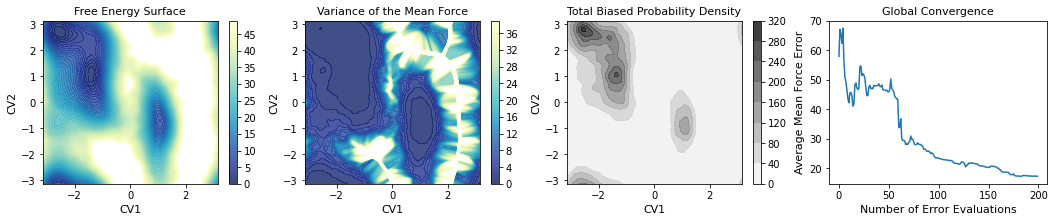

In [1]:
import numpy as np
from pyMFI import MFI

path = os.getcwd()
print("The path to this notebook is:", path)

os.chdir(path)
try: os.mkdir("AlanineDipeptide_pyMFI")
except: print("folder \"AlanineDipeptide_pyMFI\" already exists")
os.chdir("AlanineDipeptide_pyMFI")

#Read the HILLS file
HILLS=MFI.load_HILLS_2D(hills_name="HILLS40")

#Read the Colvar File
[position_x, position_y] = MFI.load_position_2D(position_name="position40")

#Compute the time-independent mean force
[X, Y, Ftot_den, Ftot_x, Ftot_y, ofe_map, ofe_history] = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.1, kT = 2.49, log_pace = 1, error_pace = 200, WellTempered=1, nhills=5000, periodic=1)

#integration with the FFT method
[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y)

# Plot Recap
MFI.plot_recap_2D(X, Y, FES, Ftot_den, ofe_map, ofe_history)




folder "Antoniu_2D_potential" already exists
Total no. of Gaussians analysed: 5000
|5000/5000|==> Average Mean Force Error: 5.34209080136083


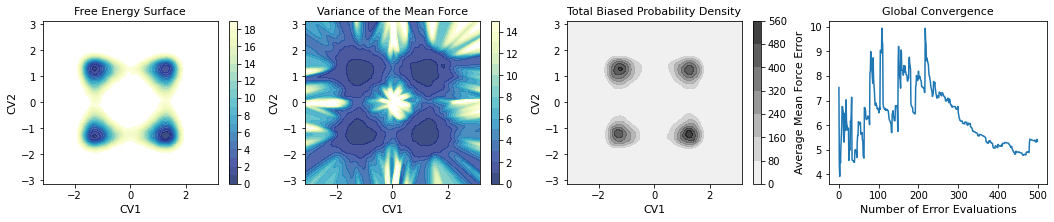

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pyMFI import MFI
from pyMFI import langevin

os.chdir(path)
try: os.mkdir("Antoniu_2D_potential")
except: print("folder \"Antoniu_2D_potential\" already exists")
os.chdir("Antoniu_2D_potential")


#Read the HILLS file
HILLS=MFI.load_HILLS_2D(hills_name="HILLS_potential")

#Read the Colvar File
[position_x, position_y] = MFI.load_position_2D(position_name="position_potential")

#Compute the time-independent mean force
[X, Y, Ftot_den, Ftot_x, Ftot_y, ofe_map, ofe_history] = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.1, kT = 1, log_pace = 1, error_pace = 500, nhills=5000)

#integration on a periodic domain
[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y)

#Simpler integration test
[X, Y, FES2] = MFI.intg_2D(Ftot_x, Ftot_y) 

# Plot Recap
MFI.plot_recap_2D(X, Y, FES, Ftot_den, ofe_map, ofe_history, FES_lim=20, ofe_map_lim=16)

Total no. of Gaussians analysed: 500
|500/500|==> Average Mean Force Error: 9.8560911807163
Total no. of Gaussians analysed: 500
|500/500|==> Average Mean Force Error: 5.4408674522825216
Total no. of Gaussians analysed: 500
|500/500|==> Average Mean Force Error: 7.092944217130059
Total no. of Gaussians analysed: 500
|500/500|==> Average Mean Force Error: 7.738288164024022
Total no. of Gaussians analysed: 500
|500/500|==> Average Mean Force Error: 10.386335547948628
Total no. of Gaussians analysed: 500
|500/500|==> Average Mean Force Error: 7.121468450187911
Total no. of Gaussians analysed: 500
|500/500|==> Average Mean Force Error: 7.503848716196188
Total no. of Gaussians analysed: 500
|500/500|==> Average Mean Force Error: 6.19222744545017
Total no. of Gaussians analysed: 500
|500/500|==> Average Mean Force Error: 4.823718450025093
Total no. of Gaussians analysed: 500
|500/500|==> Average Mean Force Error: 10.246363850040805


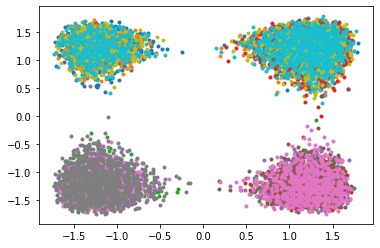

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pyMFI import MFI
from pyMFI import langevin

os.chdir(path)
try: os.mkdir("Antoniu_2D_potential")
except: print("folder \"Antoniu_2D_potential\" already exists")
os.chdir("Antoniu_2D_potential")


nhills = 500
master = []
all_hills= []
ipos=1.3*(2 * np.random.rand(2) - 1)
FP = np.zeros((200,200))

for simulation in np.arange(0,10): 
    #RUN short sim from random location
    #langevin.run_2D(ipos=ipos,tag=simulation)
    #!plumed pesmd < input  >/dev/null
    #Read the HILLS file
    HILLS=MFI.load_HILLS_2D(hills_name="HILLS_"+str(simulation))
    plt.plot(HILLS[:,1],HILLS[:,2],'.')
    #Read the Colvar File
    [position_x, position_y] = MFI.load_position_2D(position_name="position_"+str(simulation))
    #COMPUTE Mean force and weight of the simulation
    [X, Y, Ftot_den, Ftot_x, Ftot_y, ofe_map, ofe_history] = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.1, kT = 1, log_pace = 1, error_pace = 1, nhills=nhills)
    master.append([Ftot_den, Ftot_x, Ftot_y])
    FP += Ftot_den
    ipos=1.3*(2 * np.random.rand(2) - 1)    

In [4]:
#Patch
[Ftot_den_patch, Ftot_x_patch, Ftot_y_patch] = MFI.patch_2D(master)

#integration on a periodic domain
[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x_patch, Ftot_y_patch,nbins=(200,200))

# Plot Recap
MFI.plot_patch_2D(X, Y, FES, Ftot_den_patch, lim=30)


NameError: name 'master' is not defined

Total no. of Gaussians analysed: 500
|500/500|==> Average Mean Force Error: 11.179675188813977
Total no. of Gaussians analysed: 500
|500/500|==> Average Mean Force Error: 8.319299836336574
Total no. of Gaussians analysed: 500
|500/500|==> Average Mean Force Error: 7.945473622876131
Total no. of Gaussians analysed: 500
|500/500|==> Average Mean Force Error: 9.12559841057757


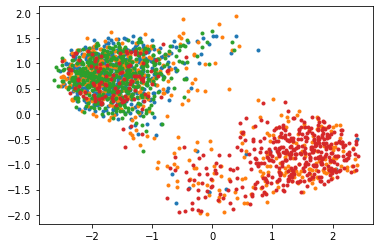

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pyMFI import MFI
from pyMFI import langevin

os.chdir(path)
try: os.mkdir("Invernizzi_2D_potential")
except: print("folder \"Invernizzi_2D_potential\" already exists")
os.chdir("Invernizzi_2D_potential")

master = []
all_hills= []
ipos=1.3*(2 * np.random.rand(2) - 1)
FP = np.zeros((200,200))

for simulation in np.arange(0,4): 
    #RUN short sim from random location
    #langevin.run_2D_Invernizzi(ipos=ipos,tag=simulation)
    #!plumed pesmd < input  >/dev/null
    #Read the HILLS file
    HILLS=MFI.load_HILLS_2D(hills_name="HILLSinve_"+str(simulation))
    plt.plot(HILLS[:,1],HILLS[:,2],'.')
    #Read the Colvar File
    [position_x, position_y] = MFI.load_position_2D(position_name="positioninve_"+str(simulation))
    #COMPUTE Mean force and weight of the simulation
    [X, Y, Ftot_den, Ftot_x, Ftot_y, ofe_map, ofe_history] = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.12, kT = 1, log_pace = 1, error_pace = 1, nhills=-1)
    master.append([Ftot_den, Ftot_x, Ftot_y])
    FP += Ftot_den
    ipos=1.3*(2 * np.random.rand(2) - 1)
    

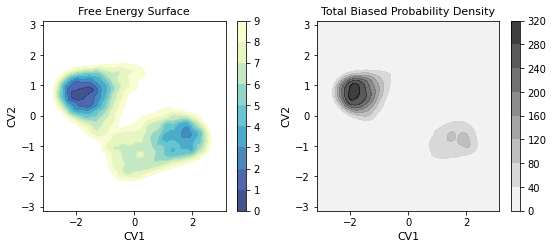

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pyMFI import MFI
from pyMFI import langevin

[Ftot_den_patch, Ftot_x_patch, Ftot_y_patch] = MFI.patch_2D(master)

#integration on a periodic domain
[X, Y, FES] = MFI.intg_2D(Ftot_x_patch, Ftot_y_patch)

# Plot Recap
MFI.plot_patch_2D(X, Y, FES, Ftot_den_patch,lim=10)
